In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Alemayehu\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Alemayehu\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
data = pd.read_csv("Data/breast_cancer.csv")

In [13]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [14]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

In [15]:
data.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [16]:
#Setting the feature we want to predict
y = data.pop("malignant")

In [37]:
y

0      0
1      0
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     0
23     1
24     0
25     1
26     0
27     0
28     0
29     0
      ..
669    1
670    1
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    1
681    1
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
690    0
691    1
692    0
693    0
694    0
695    0
696    1
697    1
698    1
Name: malignant, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [19]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [20]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [21]:
best_rfc = estimator.best_estimator_

# Accuracy

In [22]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

('Accuracy: ', 0.97142857142857142)


In [23]:
y_hat = best_rfc.predict(X_test)

In [24]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [25]:
y_test.head()

158    0
499    0
396    0
155    1
321    0
Name: malignant, dtype: int64

In [26]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print (correct / float(total))

0.971428571429


# Precission and Recall

In [27]:
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



In [28]:
print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 2 43]]


Accuracy: (93+43)/(93+2+2+43) = 136/140 = 0.97142857143  (http://www2.cs.uregina.ca/~dbd/cs831/notes/confusion_matrix/confusion_matrix.html)

Precision: 43 / 43 + 2 = .96

Recall: 43 / 43 + 2 = .96

# AUC

In [31]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

('AUC Score: ', 0.99578947368421045)


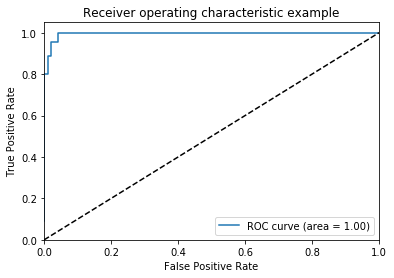

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# K-Fold Cross Validation


In [33]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [34]:
scores

array([ 0.91549296,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.97142857,  0.97142857,  0.98571429,  0.98550725,  0.98550725])

In [36]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))

Score is 0.965794 +/-  0.018764


# Discussion

Accuracy is the proportion of the total number of predictions that were correct (the number of correct answers overall in the model divided by total number of answers). The 97% accuracy in this model is due to overfitting, which will be explained later.

Precision (ratio of type 1 errors) is the proportion of the predicted positive cases (class 1) that were correct. It means the model correctly identifies 96% of the women with malignant and conversely 4% of the women with no malignant. Mathematically Precision is defined as the number of true positives (T_p) over the number of true positives plus the number of false positives (F_p).  Precison = T_p / (T_p + F_p) = 43/(43 +2) = 43/45 = 0.96

A recall or true positive rate (ratio of type 2 errors) is the proportion of positive cases that were correctly identified. Of the women that the model correctly identifies them with malignant, 96% of them have actually the disease and 4% don’t have. Mathematically, Recall is defined as the number of true positives (T_p) over the number of true positives plus the number of false negatives (F_n). Recall = T_p / (T_p + F_n)=  43/(43 +2) = 43/45 = 0.96

AUC is not accuracy but the area under the curve shown above. AUC of a means Perfect true positives and no fall positives.

We see the overfitting in the above analysis (accuracy of 97%), what most likely happened is that in our sampling (20% of test and 80% training), the training data may not be representative enough of classes from the test data. For small data sizes, a certain class could be missing from the training set, in that case we could hardly expect a classiﬁer learned from that data to perform well on the test data of that class. 

To mitigate any bias caused by the sample chosen for holdout is to repeat the whole process, training and testing, several times with different random samples (Witten and Frank, 3rd ed) This is the basis for the K-fold cross validation. We have a more reasonable accuracy between 95% and 98% in our 10-fold cross validation.


